# 1. Data Preprocessing

In [15]:
import pandas as pd

In [3]:
df=pd.read_csv("/content/Online-retail.csv")
df

,"shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil"
0,"burgers,meatballs,eggs"
1,chutney
2,"turkey,avocado"
3,"mineral water,milk,energy bar,whole wheat rice..."
4,low fat yogurt
...,...
7495,"butter,light mayo,fresh bread"
7496,"burgers,frozen vegetables,eggs,french fries,ma..."
7497,chicken
7498,"escalope,green tea"


In [5]:
df.describe()

,"shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil"
count,7500
unique,5175
top,cookies
freq,223


In [6]:
df.head()

,"shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil"
0,"burgers,meatballs,eggs"
1,chutney
2,"turkey,avocado"
3,"mineral water,milk,energy bar,whole wheat rice..."
4,low fat yogurt


In [7]:
df.shape

(7500, 1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                           Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                           --------------  ----- 
 0   shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil  7500 non-null   object
dtypes: object(1)
memory usage: 58.7+ KB


In [9]:
df.isnull().sum()

,0
"shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil",0


In [10]:
df.dropna()

,"shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil"
0,"burgers,meatballs,eggs"
1,chutney
2,"turkey,avocado"
3,"mineral water,milk,energy bar,whole wheat rice..."
4,low fat yogurt
...,...
7495,"butter,light mayo,fresh bread"
7496,"burgers,frozen vegetables,eggs,french fries,ma..."
7497,chicken
7498,"escalope,green tea"


In [11]:
df.drop_duplicates(inplace=True)

In [12]:
print(df.head())

  shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0                             burgers,meatballs,eggs                                                                                                                                                                             
1                                            chutney                                                                                                                                                                             
2                                     turkey,avocado                                                                                                                                                                             
3  mineral water,milk,energy bar,whole wheat rice...                                            

In [13]:
print(df.columns)

Index(['shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil'], dtype='object')


In [14]:
df.columns = ['Transactions']

In [16]:
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_data = te.fit(df['Transactions'].apply(lambda x: x.split(','))).transform(df['Transactions'].apply(lambda x: x.split(',')))
df_transformed = pd.DataFrame(te_data, columns=te.columns_)

# 2. Association Rule Mining

In [17]:
from mlxtend.frequent_patterns import apriori, association_rules

In [18]:
frequent_itemsets = apriori(df_transformed, min_support=0.01, use_colnames=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [19]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
print(rules)

                        antecedents      consequents  antecedent support  \
0              (chicken, chocolate)  (mineral water)            0.021256   
1            (chocolate, olive oil)  (mineral water)            0.023575   
2               (ground beef, eggs)  (mineral water)            0.028792   
3  (frozen vegetables, ground beef)  (mineral water)            0.024541   
4  (frozen vegetables, ground beef)      (spaghetti)            0.024541   
5               (milk, ground beef)  (mineral water)            0.031691   
6           (pancakes, ground beef)  (mineral water)            0.020870   
7                 (milk, olive oil)  (mineral water)            0.024155   
8                      (soup, milk)  (mineral water)            0.021449   
9                 (soup, spaghetti)  (mineral water)            0.020676   

   consequent support   support  confidence      lift  leverage  conviction  \
0            0.299710  0.011014    0.518182  1.728943  0.004644    1.453432   
1    

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [24]:
rules1=association_rules(frequent_itemsets,metric='lift',min_threshold=0.9).head()
rules1.head()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(mineral water),(almonds),0.299710,0.029179,0.010821,0.036106,1.237399,0.002076,1.007186,0.273962
1,(almonds),(mineral water),0.029179,0.299710,0.010821,0.370861,1.237399,0.002076,1.113092,0.197619
2,(avocado),(chocolate),0.045797,0.205217,0.010242,0.223629,1.089716,0.000843,1.023715,0.086281
3,(chocolate),(avocado),0.205217,0.045797,0.010242,0.049906,1.089716,0.000843,1.004325,0.103588
4,(avocado),(french fries),0.045797,0.192657,0.011594,0.253165,1.314069,0.002771,1.081019,0.250476


In [25]:
rules1[(rules1.support > 0.1) & (rules1.confidence > 0.9)].sort_values("confidence", ascending = False).shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(0, 10)

In [26]:
rules1.sort_values('lift',ascending=False).head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
4,(avocado),(french fries),0.045797,0.192657,0.011594,0.253165,1.314069,0.002771,1.081019,0.250476
0,(mineral water),(almonds),0.299710,0.029179,0.010821,0.036106,1.237399,0.002076,1.007186,0.273962
1,(almonds),(mineral water),0.029179,0.299710,0.010821,0.370861,1.237399,0.002076,1.113092,0.197619
2,(avocado),(chocolate),0.045797,0.205217,0.010242,0.223629,1.089716,0.000843,1.023715,0.086281
3,(chocolate),(avocado),0.205217,0.045797,0.010242,0.049906,1.089716,0.000843,1.004325,0.103588


In [27]:
lift1 = rules1[rules1.lift>1]
lift1.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(mineral water),(almonds),0.299710,0.029179,0.010821,0.036106,1.237399,0.002076,1.007186,0.273962
1,(almonds),(mineral water),0.029179,0.299710,0.010821,0.370861,1.237399,0.002076,1.113092,0.197619
2,(avocado),(chocolate),0.045797,0.205217,0.010242,0.223629,1.089716,0.000843,1.023715,0.086281
3,(chocolate),(avocado),0.205217,0.045797,0.010242,0.049906,1.089716,0.000843,1.004325,0.103588
4,(avocado),(french fries),0.045797,0.192657,0.011594,0.253165,1.314069,0.002771,1.081019,0.250476


In [29]:
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


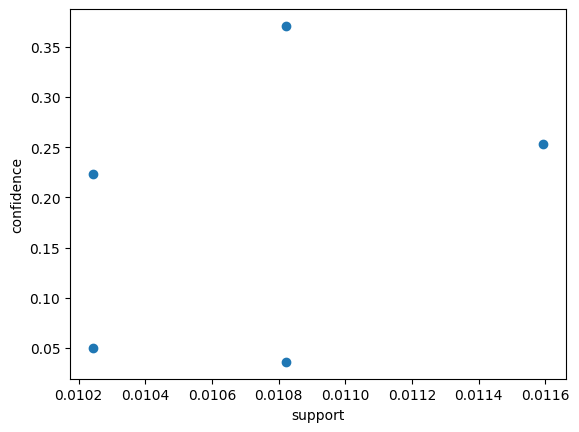

In [30]:
plt.scatter(rules1['support'],rules1['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

In [31]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# 3. Analysis and Interpretation

In [34]:
df_onehot = df['Transactions'].str.get_dummies(',')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [35]:
frequent_itemsets = apriori(df_onehot, min_support=0.01, use_colnames=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [36]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.2)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [37]:
rules = rules.sort_values('lift', ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [38]:
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))


                            antecedents          consequents   support  \
176                 (whole wheat pasta)          (olive oil)  0.011014   
126                     (herb & pepper)        (ground beef)  0.022802   
314             (shrimp, mineral water)  (frozen vegetables)  0.010435   
303      (frozen vegetables, spaghetti)        (ground beef)  0.012560   
342                   (spaghetti, milk)          (olive oil)  0.010242   
304    (frozen vegetables, ground beef)          (spaghetti)  0.012560   
338               (soup, mineral water)               (milk)  0.012367   
188                (french fries, eggs)            (burgers)  0.011401   
328          (spaghetti, mineral water)        (ground beef)  0.024734   
312  (frozen vegetables, mineral water)             (shrimp)  0.010435   

     confidence      lift  
176    0.271429  3.100757  
126    0.343023  2.525100  
314    0.312139  2.403747  
303    0.321782  2.368738  
342    0.204633  2.337697  
304    0.511811  

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [40]:
rules.to_csv('association_rules_output.csv', index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [41]:
mineral_water_rules = rules[rules['antecedents'].apply(lambda x: 'mineral water' in str(x))]
print("\nRules with 'mineral water':")
print(mineral_water_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head())



Rules with 'mineral water':
                            antecedents          consequents   support  \
314             (shrimp, mineral water)  (frozen vegetables)  0.010435   
338               (soup, mineral water)               (milk)  0.012367   
328          (spaghetti, mineral water)        (ground beef)  0.024734   
312  (frozen vegetables, mineral water)             (shrimp)  0.010435   
336             (shrimp, mineral water)               (milk)  0.011401   

     confidence      lift  
314    0.312139  2.403747  
338    0.369942  2.175512  
328    0.290909  2.141472  
312    0.206897  2.095283  
336    0.341040  2.005550  


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [42]:
high_confidence_rules = rules[rules['confidence'] > 0.7]
print("\nHigh Confidence Rules:")
print(high_confidence_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head())



High Confidence Rules:
Empty DataFrame
Columns: [antecedents, consequents, support, confidence, lift]
Index: []


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
